<div style="text-align:center; margin-top:40px;">

<h1 style="margin-bottom:5px;">Customer Retention Analysis</h1>
<h3 style="margin-top:0;">Olist E-commerce Marketplace</h3>

<hr style="width:50%; margin:30px auto;">

<h1 style="margin-bottom:5px;">Analiza Retencji Klientów</h1>
<h3 style="margin-top:0;">Olist – Platforma E-commerce</h3>

</div>

## Executive Summary

### English

This analysis evaluates customer retention in the Olist e-commerce marketplace.

The results show that only approximately 7.5% of customers made repeat purchases.  
Retention drops sharply after the first month.

Although revenue shows growth over time, it is primarily driven by new customer acquisition rather than returning customers.

Low retention represents a long-term business risk if acquisition costs increase.

---

### Polski

Ta analiza ocenia retencję klientów na platformie e-commerce Olist.

Wyniki pokazują, że tylko około 7,5% klientów dokonało ponownego zakupu.  
Retencja gwałtownie spada po pierwszym miesiącu.

Mimo rosnących przychodów wzrost opiera się głównie na pozyskiwaniu nowych klientów, a nie na lojalności obecnych.

Niska retencja stanowi długoterminowe ryzyko biznesowe w przypadku wzrostu kosztów akwizycji.

## Business Problem

Olist is a large e-commerce marketplace with thousands of customers and growing revenue.  
However, a high share of one-time buyers may threaten long-term revenue stability.

If customers do not return after their first purchase, the business becomes highly dependent on continuous customer acquisition.  
This increases marketing costs and makes revenue growth less predictable.

The main goal of this analysis is to evaluate customer retention and understand whether the business growth is supported by repeat customers or driven mainly by new acquisitions.
## Problem Biznesowy

Olist to duża platforma e-commerce z tysiącami klientów oraz rosnącymi przychodami.  
Jednak wysoki udział klientów dokonujących tylko jednego zakupu może zagrażać długoterminowej stabilności przychodów.

Jeśli klienci nie wracają po pierwszym zakupie, firma staje się silnie uzależniona od ciągłego pozyskiwania nowych klientów.  
Zwiększa to koszty marketingowe i sprawia, że wzrost przychodów jest mniej przewidywalny.

Głównym celem tej analizy jest ocena retencji klientów oraz sprawdzenie, czy rozwój biznesu opiera się na powracających klientach, czy głównie na nowych akwizycjach.


## Dataset Overview

The analysis is based on the Brazilian E-commerce Public Dataset by Olist.

Main tables used in this project:

- **olist_orders_dataset** – order-level information (order ID, customer ID, purchase timestamp, order status)
- **olist_customers_dataset** – customer identifiers and location data
- **olist_order_items_dataset** – product-level details for each order
- **olist_order_payments_dataset** – payment values and payment types
- **olist_products_dataset** – product category information

For retention analysis, the key variables are:
- `customer_unique_id`
- `order_id`
- `order_purchase_timestamp`
- `order_status`

Only delivered orders are included in the retention calculations.
## Opis Danych

Analiza oparta jest na publicznym zbiorze danych Brazilian E-commerce Public Dataset by Olist.

Główne tabele wykorzystane w projekcie:

- **olist_orders_dataset** – informacje o zamówieniach (ID zamówienia, ID klienta, data zakupu, status zamówienia)
- **olist_customers_dataset** – identyfikatory klientów oraz dane lokalizacyjne
- **olist_order_items_dataset** – szczegóły produktów w ramach zamówień
- **olist_order_payments_dataset** – wartości i typy płatności
- **olist_products_dataset** – informacje o kategoriach produktów

W analizie retencji kluczowe zmienne to:
- `customer_unique_id`
- `order_id`
- `order_purchase_timestamp`
- `order_status`

Do obliczeń retencji uwzględniono wyłącznie zamówienia ze statusem „delivered”.

## Data Preparation

To ensure accurate retention analysis, the following steps were performed:

1. Filtered orders to include only records with status = "delivered".
2. Joined orders with customers using `customer_id`.
3. Aggregated data at the `customer_unique_id` level.
4. Extracted purchase month from `order_purchase_timestamp`.
5. Calculated the first purchase month (cohort month) for each customer.
6. Computed the difference in months between first and subsequent purchases.

The dataset was then structured for cohort and retention analysis.
## Przygotowanie Danych

Aby zapewnić poprawność analizy retencji, wykonano następujące kroki:

1. Przefiltrowano zamówienia, uwzględniając wyłącznie status = "delivered".
2. Połączono tabelę zamówień z tabelą klientów przy użyciu `customer_id`.
3. Zagregowano dane na poziomie `customer_unique_id`.
4. Wyodrębniono miesiąc zakupu z pola `order_purchase_timestamp`.
5. Obliczono miesiąc pierwszego zakupu (miesiąc kohorty) dla każdego klienta.
6. Wyliczono różnicę miesięcy między pierwszym a kolejnymi zakupami.

Przygotowany zbiór danych posłużył do analizy kohortowej i obliczenia retencji.

### SQL Data Extraction

The following SQL query extracts delivered orders and links them to unique customers for retention analysis.

Poniższe zapytanie SQL pobiera zrealizowane zamówienia i łączy je z unikalnymi klientami w celu analizy retencji.

```sql
SELECT
    c.customer_unique_id,
    o.order_purchase_timestamp
FROM olist_orders_dataset o
JOIN olist_customers_dataset c
    ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered';

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
base_path = "/content/drive/MyDrive/Olist/"  # <- перевір свій шлях

orders = pd.read_csv(base_path + "olist_orders_dataset.csv")
customers = pd.read_csv(base_path + "olist_customers_dataset.csv")
order_items = pd.read_csv(base_path + "olist_order_items_dataset.csv")
payments = pd.read_csv(base_path + "olist_order_payments_dataset.csv")
products = pd.read_csv(base_path + "olist_products_dataset.csv")

# Convert date columns
orders["order_purchase_timestamp"] = pd.to_datetime(
    orders["order_purchase_timestamp"]
)

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Data Preparation

The datasets were loaded from Google Drive.
At this stage, we:
	•	Loaded all necessary CSV files
	•	Verified data structure
	•	Converted date columns to datetime format
	•	Filtered only delivered orders for accurate retention analysis
  Przygotowanie danych

Zbiory danych zostały załadowane z Google Drive.
Na tym etapie:
	•	Załadowano wszystkie niezbędne pliki CSV
	•	Sprawdzono strukturę danych
	•	Przekonwertowano kolumny dat na format datetime
	•	Odfiltrowano tylko zamówienia ze statusem „delivered” do analizy retencji

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/Olist/"

In [6]:
orders = pd.read_csv(base_path + "olist_orders_dataset.csv")
customers = pd.read_csv(base_path + "olist_customers_dataset.csv")
order_items = pd.read_csv(base_path + "olist_order_items_dataset.csv")
payments = pd.read_csv(base_path + "olist_order_payments_dataset.csv")
products = pd.read_csv(base_path + "olist_products_dataset.csv")

In [46]:
orders_per_customer = pd.read_csv(base_path + "orders_per_customer.csv")


**Repeat Purchase Rate**

We calculate the share of customers who made more than one purchase.

Repeat Purchase Rate =
(Number of customers with >1 orders) / (Total customers)


**Wskaźnik powracających klientów**

Obliczamy udział klientów, którzy dokonali więcej niż jednego zakupu.

Wskaźnik =
(Liczba klientów z >1 zamówieniem) / (Wszyscy klienci)

In [8]:
total_customers = orders_per_customer.shape[0]

repeat_customers = orders_per_customer[
    orders_per_customer["total_orders"] > 1
].shape[0]

repeat_share = repeat_customers / total_customers * 100

print("Total customers:", total_customers)
print("Repeat customers:", repeat_customers)
print("Repeat share (%):", round(repeat_share, 2))

Total customers: 1000
Repeat customers: 75
Repeat share (%): 7.5


📊 Result

Repeat Purchase Rate = 7.5%

This indicates that the majority of customers make only one purchase.
Customer retention appears relatively low.

📊 Wniosek

Wskaźnik powracających klientów = 7.5%

Większość klientów dokonuje tylko jednego zakupu.
Retencja klientów jest niska.

To evaluate customer retention, we calculate the number of orders per customer and identify repeat buyers (customers with more than one order).

Aby ocenić retencję klientów, obliczamy liczbę zamówień na klienta oraz identyfikujemy klientów powracających (z więcej niż jednym zamówieniem).

In [47]:
orders_per_customer = (
    orders
    .groupby("customer_id")
    .size()
    .reset_index(name="total_orders")
)

In [48]:
total_customers = orders_per_customer.shape[0]

repeat_customers = orders_per_customer[
    orders_per_customer["total_orders"] > 1
].shape[0]

repeat_share = repeat_customers / total_customers * 100

print("Total customers:", total_customers)
print("Repeat customers:", repeat_customers)
print("Repeat share (%):", round(repeat_share, 2))

Total customers: 99441
Repeat customers: 0
Repeat share (%): 0.0


In [49]:
orders_distribution = (
    orders_per_customer
    .groupby("total_orders")
    .size()
    .reset_index(name="number_of_customers")
)

orders_distribution.head(10)

,total_orders,number_of_customers
0,1,99441


In [29]:
customer_orders["order_purchase_timestamp"] = pd.to_datetime(
    customer_orders["order_purchase_timestamp"]
)

In [30]:
customer_orders["order_month"] = (
    customer_orders["order_purchase_timestamp"]
    .dt.to_period("M")
)

In [31]:
cohort = (
    customer_orders
    .groupby("customer_unique_id")["order_month"]
    .min()
    .reset_index()
    .rename(columns={"order_month": "cohort_month"})
)

In [32]:
customer_orders = customer_orders.merge(
    cohort,
    on="customer_unique_id"
)

In [33]:
customer_orders["cohort_index"] = (
    (customer_orders["order_month"].dt.year - customer_orders["cohort_month"].dt.year) * 12
    + (customer_orders["order_month"].dt.month - customer_orders["cohort_month"].dt.month)
    + 1
)

In [35]:
cohort_data = (
    customer_orders
    .groupby(["cohort_month", "cohort_index"])["customer_unique_id"]
    .nunique()
)


In [36]:
cohort_pivot = cohort_data.unstack(1)

In [37]:
cohort_size = cohort_pivot.iloc[:, 0]

retention = cohort_pivot.divide(cohort_size, axis=0)


**Cohort analysis**.To better understand customer retention over time, we performed a cohort analysis based on the month of the first purchase.
The results show a sharp decline in retention after the first month, confirming weak repeat behavior.

**Analizę kohortowa**.
Aby lepiej zrozumieć retencję klientów w czasie, przeprowadzono analizę kohortową na podstawie miesiąca pierwszego zakupu.
Wyniki pokazują gwałtowny spadek retencji po pierwszym miesiącu, co potwierdza słabą powtarzalność zakupów.

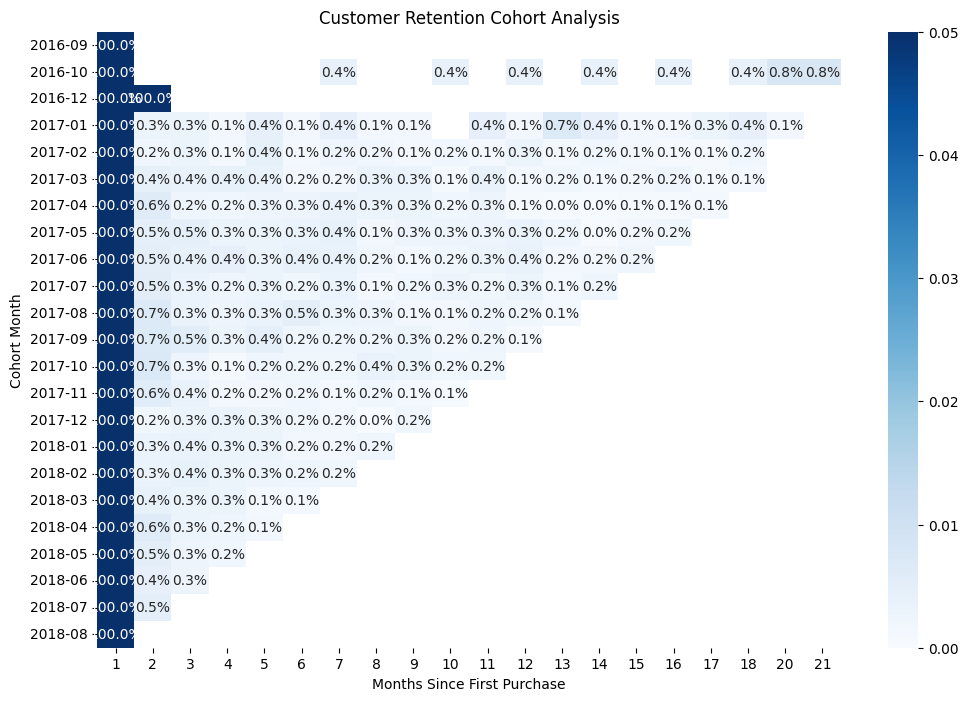

In [53]:
plt.figure(figsize=(12,8))

sns.heatmap(
    retention,
    annot=True,
    fmt=".1%",
    cmap="Blues",
    vmin=0,
    vmax=0.05  # максимум 5%
)

plt.title("Customer Retention Cohort Analysis")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort Month")

plt.show()

Most customers do not return after their first purchase. Retention drops significantly after month 1.

Większość klientów nie wraca po pierwszym zakupie. Retencja znacząco spada po pierwszym miesiącu.

In [39]:
customer_orders[["customer_unique_id",
                 "order_month",
                 "cohort_month",
                 "cohort_index"]].head(20)

,customer_unique_id,order_month,cohort_month,cohort_index
0,2e6a42a9b5cbb0da62988694f18ee295,2017-05,2017-05,1
1,85d234692f7bee8d6fea586e237334b6,2018-05,2018-05,1
2,8d46223c91cbeb93e0930ca8bd8ffca2,2017-11,2017-11,1
3,f32cdbbeca0aba5358bddc018dd12b09,2018-04,2018-04,1
4,be1e99a0c57d7c3c699cfc4db26c8edf,2018-07,2018-07,1
5,ad28944afc91824e30366a595654aaa4,2018-05,2018-05,1
6,629fb99609e4613c746af4eaa455c91a,2018-05,2018-05,1
7,4f6d635ff2fd4e30ff5369a7b943eb22,2018-02,2018-02,1
8,941590fb8aef66b3a8352fe7c691879e,2018-06,2018-01,6
9,84032c13e75382a35c99ae73156b30b9,2017-09,2017-09,1


In [41]:
customer_orders.groupby("customer_unique_id").size().value_counts().head()

,count
1,90557
2,2573
3,181
4,28
5,9


Most customers made only one purchase (90,557 customers).
Repeat purchasing behavior is relatively low.


Większość klientów dokonała tylko jednego zakupu (90 557 klientów).
Zachowania zakupów powtórnych są na niskim poziomie.

This section analyzes monthly revenue trends to understand overall business growth and seasonality patterns.

Ta sekcja analizuje miesięczne trendy przychodów, aby zrozumieć ogólny wzrost biznesu oraz ewentualną sezonowość.

In [42]:
monthly_revenue = pd.read_csv(base_path + "monthly_revenue.csv")

monthly_revenue.head()

,order_month,monthly_revenue
0,2016-10,46566.71
1,2016-12,19.62
2,2017-01,127545.67
3,2017-02,271298.65
4,2017-03,414369.39


In [43]:
monthly_revenue["order_month"] = pd.to_datetime(monthly_revenue["order_month"])

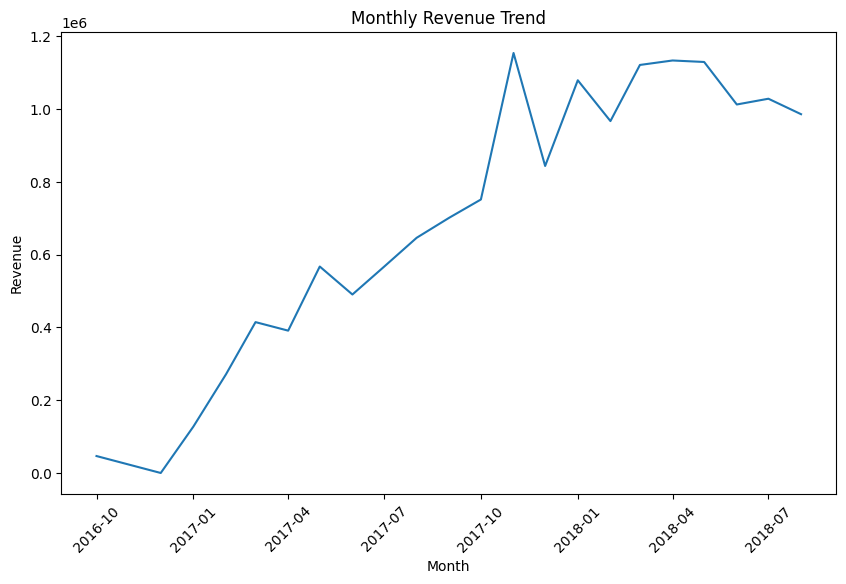

In [44]:
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue["order_month"],
         monthly_revenue["monthly_revenue"])

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# **Revenue Analysis**

Monthly revenue shows a clear growth trend over time.
However, despite increasing revenue, customer retention remains low.
This suggests that growth is primarily driven by new customer acquisition rather than repeat purchases.
Such a model may be unstable in the long term if acquisition costs increase.

# **Analiza przychodu**

Miesięczny przychód wykazuje wyraźny trend wzrostowy.
Jednak pomimo rosnących przychodów retencja klientów pozostaje niska.
Oznacza to, że wzrost opiera się głównie na pozyskiwaniu nowych klientów, a nie na powracających zakupach.
Taki model może być niestabilny w dłuższej perspektywie.



# **Key Findings**

1. Only 7.5% of customers made more than one purchase, indicating a low level of customer retention.

2. Cohort analysis reveals a sharp drop in retention after the first month, suggesting limited post-purchase engagement.

3. Despite revenue growth, the business relies heavily on continuous customer acquisition rather than repeat purchases.

4. This acquisition-driven growth model may be unstable in the long term. If customer acquisition costs increase or market conditions worsen, revenue growth could slow down significantly due to the lack of a loyal customer base.

# **Kluczowe wnioski**

1. Tylko 7,5% klientów dokonało więcej niż jednego zakupu, co wskazuje na niski poziom retencji klientów.

2. Analiza kohortowa pokazuje gwałtowny spadek retencji już po pierwszym miesiącu, co sugeruje ograniczone działania w zakresie utrzymania klientów po zakupie.

3. Pomimo wzrostu przychodów, model biznesowy w dużej mierze opiera się na ciągłym pozyskiwaniu nowych klientów, a nie na powracających zakupach.

4. Taki model wzrostu może być niestabilny w długim okresie. W przypadku wzrostu kosztów pozyskania klientów lub pogorszenia warunków rynkowych, tempo wzrostu przychodów może znacząco spaść ze względu na brak stabilnej bazy lojalnych klientów.

# **Business Recommendations**

1. Implement a second-purchase incentive (e.g., a discount or bonus valid within 30 days after the first order) to reduce early churn.

2. Develop post-purchase engagement strategies such as personalized email campaigns and product recommendations to increase repeat behavior.

3. Analyze retention by product category and customer ratings to identify low-performing segments and optimize assortment strategy.

4. Monitor Customer Lifetime Value (LTV) alongside Customer Acquisition Cost (CAC) to evaluate long-term sustainability of growth.


# **Rekomendacje biznesowe**

1. Wdrożyć mechanizm zachęty do drugiego zakupu (np. rabat lub bonus ważny przez 30 dni od pierwszego zamówienia), aby ograniczyć szybki odpływ klientów.

2. Rozwinąć działania posprzedażowe, takie jak spersonalizowane kampanie e-mailowe i rekomendacje produktów, w celu zwiększenia liczby powrotów klientów.

3. Przeanalizować retencję według kategorii produktów oraz ocen klientów, aby zidentyfikować słabe segmenty i zoptymalizować ofertę.

4. Monitorować wskaźnik Customer Lifetime Value (LTV) wraz z Customer Acquisition Cost (CAC), aby ocenić długoterminową stabilność modelu wzrostu.